In [1]:
# Initialisation

In [2]:
import numpy as np

from IPython.display import SVG
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot  # requires graphviz installed

from sklearn.datasets import make_circles

from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


In [3]:
# Helper functions

In [4]:
def plot_data(X, y):
    plt.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
    plt.show()

def plot_decision_boundary_with_data(model, X, y, resolution=50):
    # get data range
    h_min, v_min = X.min(axis=0)
    h_max, v_max = X.max(axis=0)
    
    # subdivide the space and create a matrix of points to draw the prediction contour
    h_points = np.linspace(h_min, h_max, resolution)
    v_points = np.linspace(v_min, v_max, resolution)
    
    h_coords, v_coord = np.meshgrid(h_points, v_points)
    background_points = np.c_[h_coords.ravel(), v_coord.ravel()]
    
    predicted_points = model.predict(background_points)
    Z = predicted_points.reshape(h_coords.shape) # reshape to the range of points, but how?

    # size the image and draw the contour + points
    plt.figure(figsize=(12, 8))
    plt.contourf(h_coords, v_coord, Z, cmap='bwr', alpha=0.3)
    plot_data(X, y)

In [5]:
# Generate sample data and split into train and test sets

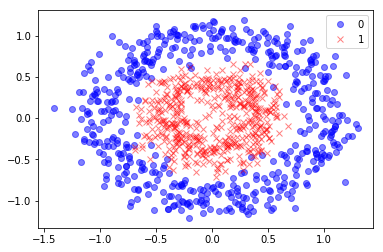

In [6]:
X, y = make_circles(n_samples=1000, noise=0.15, factor=0.4, random_state=123)
plot_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [7]:
# Generate a simple 1 layer network identical to the blob_classification

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid', name='1-dense_layer_1'))
model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=True)
print(model.evaluate(X_test, y_test))  # Accuracy keeps floating around 60%

Epoch 1/100
750/750 [==============================] - 0s 194us/step - loss: 0.7174 - acc: 0.5227
Epoch 2/100
750/750 [==============================] - 0s 28us/step - loss: 0.6964 - acc: 0.5093
Epoch 3/100
750/750 [==============================] - 0s 29us/step - loss: 0.6935 - acc: 0.5960
Epoch 4/100
750/750 [==============================] - 0s 28us/step - loss: 0.6933 - acc: 0.5827
Epoch 5/100
750/750 [==============================] - 0s 30us/step - loss: 0.6940 - acc: 0.5360
Epoch 6/100
750/750 [==============================] - 0s 30us/step - loss: 0.6943 - acc: 0.5773
Epoch 7/100
750/750 [==============================] - 0s 29us/step - loss: 0.6935 - acc: 0.5547
Epoch 8/100
750/750 [==============================] - 0s 38us/step - loss: 0.6941 - acc: 0.5560
Epoch 9/100
750/750 [==============================] - 0s 27us/step - loss: 0.6942 - acc: 0.5773
Epoch 10/100
750/750 [==============================] - 0s 33us/step - loss: 0.6943 - acc: 0.5920
Epoch 11/100
750/750 [======

750/750 [==============================] - 0s 28us/step - loss: 0.6945 - acc: 0.4960
Epoch 85/100
750/750 [==============================] - 0s 29us/step - loss: 0.6940 - acc: 0.5947
Epoch 86/100
750/750 [==============================] - 0s 28us/step - loss: 0.6940 - acc: 0.6067
Epoch 87/100
750/750 [==============================] - 0s 29us/step - loss: 0.6962 - acc: 0.4427
Epoch 88/100
750/750 [==============================] - 0s 27us/step - loss: 0.6937 - acc: 0.5613
Epoch 89/100
750/750 [==============================] - 0s 32us/step - loss: 0.6943 - acc: 0.5493
Epoch 90/100
750/750 [==============================] - 0s 31us/step - loss: 0.6940 - acc: 0.5547
Epoch 91/100
750/750 [==============================] - 0s 30us/step - loss: 0.6944 - acc: 0.5307
Epoch 92/100
750/750 [==============================] - 0s 27us/step - loss: 0.6964 - acc: 0.5280
Epoch 93/100
750/750 [==============================] - 0s 29us/step - loss: 0.6940 - acc: 0.5413
Epoch 94/100
750/750 [===========

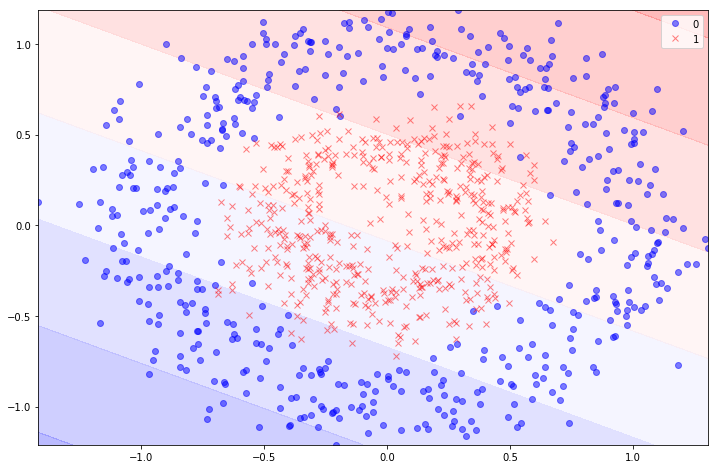

In [9]:
plot_decision_boundary_with_data(model, X, y)  # a single neuron layer is only fittin a linear relation

In [10]:
# Improve the model with 2 hidden layers and more neurons

In [11]:
deep_model = Sequential()
# ~4 is a optimal rule of thumb, but works well with 3 too
model.add(Dense(3, input_shape=(2,), activation="tanh", name='3-dense_layer_1'))  # why tanh works better here?
deep_model.add(Dense(3, activation="tanh", name='3-dense_layer_2')
deep_model.add(Dense(1, activation="sigmoid", name='1-dense_layer_3'))
deep_model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=100, verbose=False)
deep_model.summary()

TypeError: add() got an unexpected keyword argument 'name'

In [ ]:
plot_decision_boundary_with_data(deep_model, X, y)  # a single neuron layer is only fittin a linear relation
print(deep_model.evaluate(X_test, y_test))  # Accuracy keeps floating around 60%

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
SVG(model_to_dot(deep_model).create(prog='dot', format='svg'))

In [ ]:
# Callbacks during the training process

In [ ]:
callback_list = [EarlyStopping(monitor='acc', patience=5, mode='max')]
deep_model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=callback_list)

In [ ]:
# monitor the accuracy of test data instead. Wouldn't this kinda defeat the purpose of having test data in the first place?
validation_callback_list = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]
deep_model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=callback_list, validation_data=(X_test, y_test))

In [ ]:
# Model saving

In [ ]:
deep_model.save('deep_model.hdf5')